# **PROJECT 1**

## House Prices - Advanced Linear Regression Techniques
Predict sales prices and practice feature engineering

`Sapphire Oshodi - DataChicGirl`

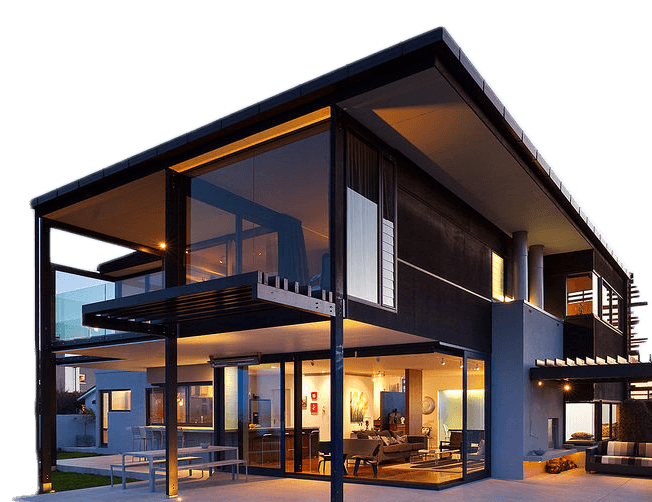




## Overview: Predicting House Prices in Lagos, Nigeria Using Linear Regression

The real estate market in Lagos, Nigeria, is dynamic and complex, characterized by rapid urbanization and diverse property types. To navigate this market effectively, a robust model for predicting house prices can be invaluable for both buyers and sellers. This project aims to develop a linear regression model that predicts house prices based on key features such as square footage and the number of bedrooms and bathrooms.

### Objectives

1. **Develop a Predictive Model**: Utilize linear regression to create a model that accurately predicts house prices in Lagos.
2. **Analyze Key Features**: Focus on the impact of square footage, number of bedrooms, and number of bathrooms on house prices.
3. **Provide Insights**: Offer insights into the Lagos real estate market based on the model's findings.

### Data Description

The dataset used for this project includes various features that describe properties in Lagos. Key features for our linear regression model include:
- **GrLivArea**: Above grade (ground) living area square footage.
- **BedroomAbvGr**: Number of bedrooms above grade.
- **FullBath**: Number of full bathrooms above grade.
- **HalfBath**: Number of half bathrooms above grade.

The target variable is the house price (`SalePrice`).


### Methodology

Model Building

- **Prepare Data**
 - Import
 - Export
 - Split
- **Build Model**
 - Baseline
 - Iterate
- **Evaluate**
- **Communicate Results**

### Expected Outcomes

- A functional linear regression model capable of predicting house prices in Lagos with reasonable accuracy.
- Insights into how square footage, number of bedrooms, and number of bathrooms influence house prices.
- Data-driven recommendations to assist stakeholders in making informed real estate decisions.

### Conclusion

By leveraging linear regression, this project aims to provide a valuable tool for predicting house prices in Lagos, Nigeria. The model will help demystify the factors driving property values and offer actionable insights for the real estate market in this bustling metropolitan area.



## **STEP ONE**
## PREPARE DATA

**1.1 IMPORT**

In [ ]:
#1.1 # Import libraries here


import warnings
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.model_selection import train_test_split


warnings.simplefilter(action="ignore", category=FutureWarning)


 Building  `wrangle` function for the project

In [ ]:
def wrangle_train(filepath):
    # Read CSV file
    data = pd.read_csv(filepath)

    # Select relevant features
    features = data[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'LotArea', 'SalePrice']]
    df = features.copy()

    # Drop rows with missing values in the selected features
    df = df.dropna()

    # Create a combined feature for the number of bathrooms
    df['TotalBath'] = df['BsmtFullBath'] + df['BsmtHalfBath'] + df['FullBath'] + df['HalfBath']

    # Drop the individual bathroom columns
    df = df.drop(columns=['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'])

    # Remove outliers by trimming the bottom and top 10% of properties in terms of "LotArea"
    low, high = df["LotArea"].quantile([0.1, 0.9])
    mask_area = df["LotArea"].between(low, high)
    df = df[mask_area]

    return df

def wrangle_test(filepath):
    # Read CSV file
    data = pd.read_csv(filepath)

    # Select relevant features
    features = data[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'LotArea']]
    df = features.copy()

    # Drop rows with missing values in the selected features
    df = df.dropna()

    # Create a combined feature for the number of bathrooms
    df['TotalBath'] = df['BsmtFullBath'] + df['BsmtHalfBath'] + df['FullBath'] + df['HalfBath']

    # Drop the individual bathroom columns
    df = df.drop(columns=['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'])

    # Remove outliers by trimming the bottom and top 10% of properties in terms of "LotArea"
    low, high = df["LotArea"].quantile([0.1, 0.9])
    mask_area = df["LotArea"].between(low, high)
    df = df[mask_area]

    # Add a placeholder for 'SalePrice' as NaN
    df['SalePrice'] = np.nan

    return df





**Importing data from CSV files using the pandas library.**

In [ ]:
#1.1 #Check wrangle function
df = wrangle('/content/train.csv')

#To display dataset information
#print("print df shape:",  df.shape)
df.head()

,BedroomAbvGr,LotArea,SalePrice,TotalBath
0,3,8450,208500,4
1,3,9600,181500,3
2,3,11250,223500,4
3,3,9550,140000,2
4,4,14260,250000,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1314 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   BedroomAbvGr  1314 non-null   int64
 1   LotArea       1314 non-null   int64
 2   SalePrice     1314 non-null   int64
 3   TotalBath     1314 non-null   int64
dtypes: int64(4)
memory usage: 51.3 KB


**1.2** **Explore Data**

In [ ]:
#To display dataset information
print(df.info())
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
Index: 1314 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   BedroomAbvGr  1314 non-null   int64
 1   LotArea       1314 non-null   int64
 2   SalePrice     1314 non-null   int64
 3   TotalBath     1314 non-null   int64
dtypes: int64(4)
memory usage: 51.3 KB
None
(1314, 4)


In [ ]:
#1.2 #Step 2: Select relevant features
features=  df[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'LotArea', 'SalePrice']]
features.head()

In [ ]:
df.describe()

,BedroomAbvGr,LotArea,SalePrice,TotalBath
count,1314.000000,1314.000000,1314.000000,1314.000000
mean,2.884323,9607.418569,179875.073059,2.395738
std,0.803845,2793.736676,76156.216997,0.919542
min,0.000000,3316.000000,34900.000000,1.000000
25%,2.000000,7819.250000,130000.000000,2.000000
50%,3.000000,9478.500000,162000.000000,2.000000
75%,3.000000,11309.500000,213500.000000,3.000000
max,8.000000,17400.000000,745000.000000,6.000000


In [ ]:
#1.3 # Step3 Checking for missing values
#No missing Values
df.isnull().sum()

,0
BedroomAbvGr,0
LotArea,0
SalePrice,0
TotalBath,0


In [ ]:
#1.4 # Step 4: Drop rows with missing values in the selected features
df = df.dropna()

In [ ]:
#1.5 # Step 5 Create a combined feature for the number of bathrooms
df['TotalBath'] = df['BsmtFullBath'] + df['BsmtHalfBath'] + df['FullBath'] + df['HalfBath']

# Drop the individual bathroom columns
df = df.drop(columns=['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'])


### **Data Exploration on the Features**

In [ ]:
import plotly.express as px

# Create a scatter plot
fig = px.scatter(
    df,  # Our DataFrame
    x='LotArea',  # X-axis data
    y='SalePrice',  # Y-axis data
    size='LotArea',  # Size of markers based on square footage
    color='SalePrice',  # Color markers based on sale price
    hover_data=['SalePrice'],  # Display sale price when hovering over markers
    title="Sale Price vs. Square Footage Area"  # Title of the plot
)

# Show the plot
fig.show()


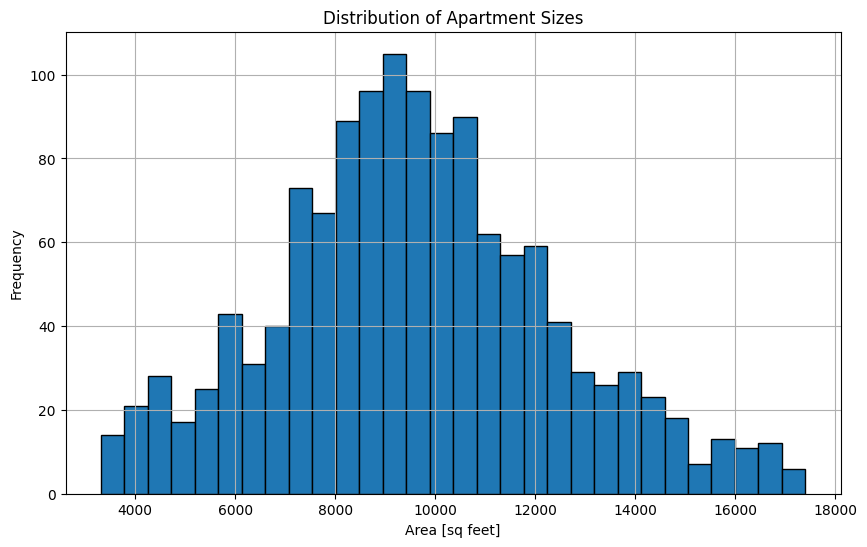

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of GrLivArea
plt.figure(figsize=(10, 6))
plt.hist(df['LotArea'], bins=30, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel("Area [sq feet]")  # Change to sq feet if that's the unit in your data
plt.ylabel("Frequency")
plt.title("Distribution of Apartment Sizes")
plt.grid(True)
plt.show()


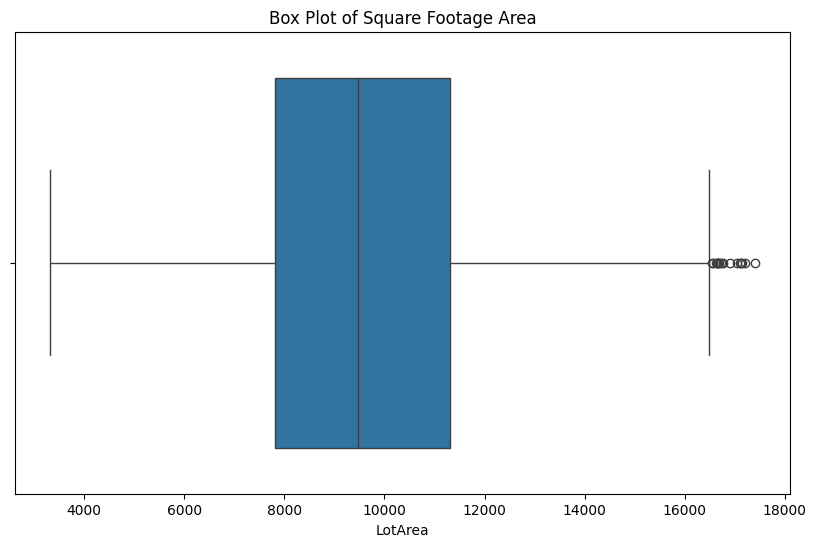

In [ ]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['LotArea'])
plt.title('Box Plot of Square Footage Area')
plt.xlabel('LotArea')
plt.show()

In [ ]:
#1.6 Remove outliers by trimming the bottom and top 10% of properties in terms of "LotArea".
#To get a summary description of "LotArea".
df['LotArea'].describe()

,LotArea
count,1314.000000
mean,9607.418569
std,2793.736676
min,3316.000000
25%,7819.250000
50%,9478.500000
75%,11309.500000
max,17400.000000


We will add to our wrangle function so that it removes observations that are outliers in the "LotArea" column. Specifically, all observations should fall between the 0.1 and 0.9 quantiles for "LotArea"

In [ ]:
df['LotArea'].quantile([0.1, 0.9])

,LotArea
0.1,6000.0
0.9,13473.4


In [ ]:
low, high = df["LotArea"].quantile([0.1, 0.9])
mask_area = df["LotArea"].between(low, high)
mask_area.head()


,LotArea
0,True
1,True
2,True
3,True
4,False


To visualize the distribution of LotArea to confirm that outliers have been appropriately filtered.

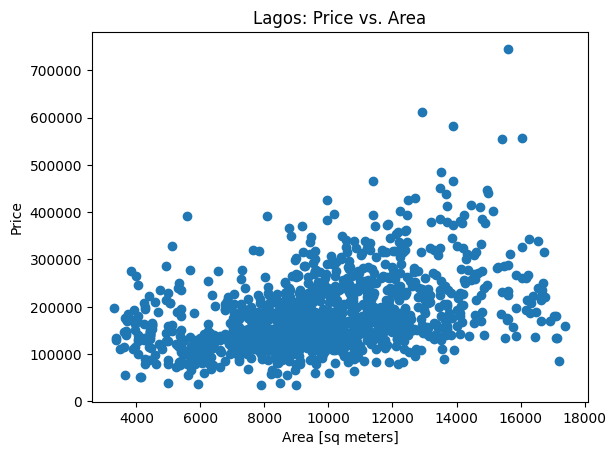

In [ ]:
plt.scatter(x=df["LotArea"], y=df["SalePrice"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price")
plt.title("Lagos: Price vs. Area");

In [ ]:
df.head()

,BedroomAbvGr,LotArea,SalePrice,TotalBath
0,3,8450,208500,4
1,3,9600,181500,3
2,3,11250,223500,4
3,3,9550,140000,2
4,4,14260,250000,4


In [ ]:
#Verify that there are no missing values left in the DataFrame after filtering
print(df.isnull().sum())


BedroomAbvGr    0
LotArea         0
SalePrice       0
TotalBath       0
dtype: int64


In [ ]:
#check the shape and a few rows of the resulting DataFrame to ensure it meets expectations
print(df.shape)
print(df.head())


(1314, 4)
   BedroomAbvGr  LotArea  SalePrice  TotalBath
0             3     8450     208500          4
1             3     9600     181500          3
2             3    11250     223500          4
3             3     9550     140000          2
4             4    14260     250000          4


**1.3 Split**

Splitting our dataset into feature Matrix

In [ ]:
# Splitting data into feature matrix `X_train` and target vector `y_train`
# Split data into feature matrix `X_train` and target vector `y_train`.
target = "SalePrice"
features = ["BedroomAbvGr", "LotArea", "TotalBath"]
X_train = df[features]
y_train = df[target]


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (1314, 3)
y_train shape: (1314,)


## **STEP TWO**
## BUILD MODEL
**2.1 Baseline**


In [ ]:
#Calculate the baseline mean absolute error for your model.
#mean of the target variable in the training set
y_mean = y_train.mean()
y_mean

179875.07305936073

In [ ]:
#  baseline prediction where every prediction is the mean of y_train
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[179875.07305936073,
 179875.07305936073,
 179875.07305936073,
 179875.07305936073,
 179875.07305936073]

The line added  to the plot below shows the relationship between the observations X_train and the dumb model's predictions y_pred_baseline.

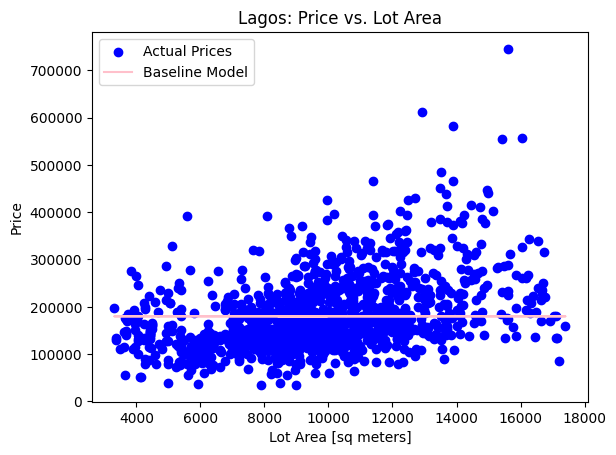

In [ ]:
plt.scatter(X_train["LotArea"], y_train, color="blue", label="Actual Prices")
plt.plot(X_train["LotArea"], y_pred_baseline, color="pink", label="Baseline Model")
plt.xlabel("Lot Area [sq meters]")
plt.ylabel("Price")
plt.title("Lagos: Price vs. Lot Area")
plt.legend()
plt.show()


Looking at this visualization, it seems like the baseline model doesn't really follow the trend in the data. But, as a data scientist, I can't depend only on a subjective plot to evaluate a model. I need an exact, mathematically calculate performance metric. There are lots of performance metrics, but the one I'll use here is the mean absolute error.

In [ ]:
# Calculate the mean absolute error (MAE)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 179875.07
Baseline MAE: 56244.6




```
 What does this information tell us?
If we always predicted that an apartment price is $176632.41,
our predictions would be off by an average of $3961.51.

It also tells us that our model needs to have mean absolute error
below $3961.51 in order to be useful.
```








 **2.2  Iterate**

 The first thing I need to do is create our model — Using linear regression.

In [ ]:
# Instantiating makepipe line and LinearRegression model
model = make_pipeline(
    SimpleImputer(),  # Imputes missing values
    LinearRegression()  # Linear Regression model
)

#Fit the model to the data, X_train and y_train

model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

INSPECTING PIPELINE STEPS

In [ ]:
for name, step in model.named_steps.items():
    print(f"Step name: {name}")
    print(f"Step type: {type(step)}")


Step name: simpleimputer
Step type: <class 'sklearn.impute._base.SimpleImputer'>
Step name: linearregression
Step type: <class 'sklearn.linear_model._base.LinearRegression'>


### **STEP THREE**
### EVALUATE

In [ ]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([245534.85899071, 207390.58393665, 267150.41845901, 159982.49768188,
       283118.01058931])

In [ ]:
#Calculate our training mean absolute error for our predictions in y_pred_training as compared to the true targets in y_train
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 39831.98




### Comparison

1. **Baseline MAE:** 53,961.51
2. **Training MAE:** 38,420.07

### Interpretation

### - **Training MAE** (38,420.07) is lower than the **Baseline MAE** (53,961.51).

This indicates that our model is performing better than the baseline model. Specifically, our model's MAE is smaller, meaning it is making predictions that are, on average, closer to the actual values compared to the baseline model.

### Why This Matters

- **Performance Improvement:** A lower MAE means that your model is better at predicting the target variable (e.g., apartment prices) than the simple baseline approach.
- **Model Effectiveness:** Since our model improves upon the baseline, it suggests that your model has learned useful patterns from the data.

### Next Steps

-  **Cross-Validation:** Check if our model performs consistently well on unseen data by evaluating it on a validation or test set.


### Summary

Our model's training MAE is better than the baseline MAE, indicating an improvement in performance. However, it's essential to evaluate your model on unseen data to ensure that it generalizes well and not just overfits the training data.

# **Testing our model with Test Dataset**
Making Predictions

In [ ]:
X_test= pd.read_csv('/content/test (1).csv')
X_test.head()
print(X_test.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

To ensure proper handling of both training and test datasets, I need to update the `wrangle` function. The test data CSV is missing the 'TotalBath' and  'SalePrice' column, which is present in the training data. Therefore, the updated `wrangle` function must accommodate the presence or absence of 'TotalBath'  and 'SalePrice'. This modification will enable the function to handle each dataset appropriately based on whether it is for training or testing.

In [ ]:
test_data = wrangle_test('/content/test (1).csv')
print(test_data.shape)
print(test_data.head())

(1165, 4)
   BedroomAbvGr  LotArea  TotalBath  SalePrice
0             2    11622        1.0        NaN
2             3    13830        3.0        NaN
3             3     9978        3.0        NaN
4             2     5005        2.0        NaN
5             3    10000        3.0        NaN


In [ ]:
features = ["BedroomAbvGr", "LotArea", "TotalBath"]
X_test = test_data[features]


In [ ]:
#Making Predictions
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()


,0
0,136225.051865
1,240045.518419
2,210308.684465
3,132164.947057
4,210478.521004


# Communicating Results

In [ ]:
# Accessing  Model Attributes
final_model = model.named_steps['linearregression']  # Replacing 'linearregression' with the actual name

# Accessing and printing the model's attributes, such as intercept and coefficients
intercept = round(final_model.intercept_, 2)

# Getting  the coefficients from the final model
coefficients = final_model.coef_

# Extracting the coefficient for "LotArea"
coefficient = round(coefficients[0], 2)

print("Model Intercept:", intercept)
print("Model Coefficients:", final_model.coef_)
print('Model coefficient for "LotArea in Square Footage":', coefficient)


Model Intercept: 14021.21
Model Coefficients: [-7.26913430e+03  7.71984267e+00  4.70220941e+04]
Model coefficient for "LotArea in Square Footage": -7269.13



Model coefficient for "LotArea in Square footage": -7269.13
Now that we have our intercept and coefficient, we need to insert them into a string that we can print out the complete equation.

In [ ]:
print(f"apt_price = {intercept} + {coefficient} * LotArea Square footage")

apt_price = 14021.21 + -7269.13 * LotArea Square footage


# VISUALIZATION

<ipython-input-119-e28744bf4bd8>:6: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.



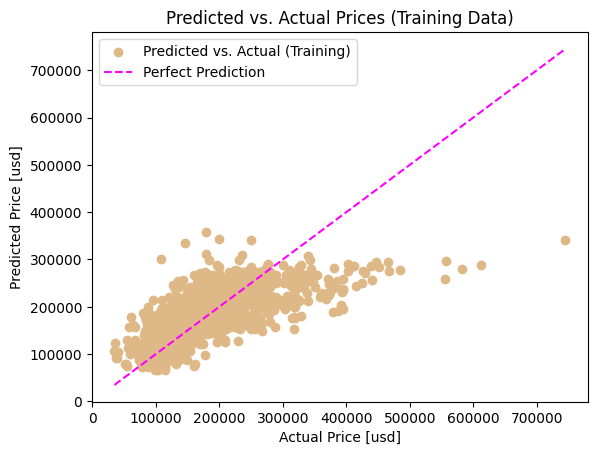

In [ ]:
# Making predictions on the training data
y_pred_train = model.predict(X_train)

# Scatter plot of the actual vs. predicted values on the training data
plt.scatter(y_train, y_pred_train, color="burlywood", label="Predicted vs. Actual (Training)")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', color='magenta', label="Perfect Prediction")

# Adding labels and title
plt.xlabel("Actual Price [usd]")
plt.ylabel("Predicted Price [usd]")
plt.title("Predicted vs. Actual Prices (Training Data)")

# Adding a legend
plt.legend()

# Display the plot
plt.show()


### **Creating DataFrame with all features, actual, and predicted values**

In [ ]:
y_pred_train = model.predict(X_train)

# Create a DataFrame with all features, actual, and predicted values
comparison_df = X_train.copy()
comparison_df['Actual Price [usd]'] = y_train
comparison_df['Predicted Price [usd]'] = y_pred_train.round(2)  # Round predicted values to 2 decimal places


comparison_df.head(10)



,BedroomAbvGr,LotArea,TotalBath,Actual Price [usd],Predicted Price [usd]
0,3,8450,4,208500,245534.86
1,3,9600,3,181500,207390.58
2,3,11250,4,223500,267150.42
3,3,9550,2,140000,159982.50
4,4,14260,4,250000,283118.01
5,1,14115,3,143000,256783.94
6,3,10084,3,307000,211126.99
7,3,10382,4,200000,260449.60
8,2,6120,2,129900,140772.57
9,2,7420,2,118000,150808.37



### **Columns Explanation:**

- **BedroomAbvGr**: This represents the number of bedrooms above ground level.
- **LotArea**: This is the total area of the lot in square feet.
- **TotalBath**: This represents the total number of bathrooms.
- **Actual Price [usd]**: This is the actual sale price of the property in USD.
- **Predicted Price [usd]**: This is the price predicted by the model, rounded to two decimal places.



### **Overall Interpretation**:
- The model generally overestimates the prices, especially for properties with larger lot sizes or more bathrooms.
- The discrepancies between the actual and predicted prices suggest that the model might be overfitting or overly emphasizing certain features like "LotArea" or "TotalBath" while underestimating or ignoring other important factors.
- To improve the model, consider:
  - Adding more relevant features.
  - Trying different model types.
  - Regularizing the model to avoid overfitting.
  - Performing feature engineering to better capture the relationship between the features and the target variable.

In [ ]:
#  download model

#import pickle

# Save the model to a file
#filename = 'Housing_Predict_model.pkl'
#pickle.dump(model, open(filename, 'wb'))

# Download the file
#from google.colab import files
#files.download(filename)


In [126]:
# prompt: open model file

# Assuming the model file is named 'Housing_Predict_model.pkl' and is in the current directory
with open('Housing_Predict_model.pkl', 'rb') as file:
  loaded_model = pickle.load(file)


In [127]:
#Testing downloaded model

# Load the trained model from a pickle file
with open('Housing_Predict_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions on the training data
y_pred_training = loaded_model.predict(X_train)

# Evaluate the trained model on the training data
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

# Predict on the test data
# Assuming X_test is already defined
y_pred_test = pd.Series(loaded_model.predict(X_test))

# Display the first few predictions
print(y_pred_test.head())


Training MAE: 39831.98
0    136225.051865
1    240045.518419
2    210308.684465
3    132164.947057
4    210478.521004
dtype: float64
